In [1]:
from mpmath import re
from src.prepare_data import load_data_for_demographic, get_referendums, get_GPT_referendum_data, get_referendum_topics, get_referendum_topics_mapping, get_data_for_topic_modelling, get_GPT_federal_election_data, prepare_data_for_topic_modelling, reshape_topic_keywords
from src.prepare_data import parties, party_colors, languages

In [2]:
from src.plot_functions import plot_party_topic_share_heatmap

In [3]:
df = load_data_for_demographic(data_folder='data')

40044
34559


In [4]:
referendum_topics = get_referendum_topics(data_folder='data')
referendums = get_referendums(data_folder='data')

In [5]:
election_topics = get_GPT_federal_election_data(data_folder='data')

In [6]:
topics_mapping = get_referendum_topics_mapping(data_folder='data')

In [7]:
df_topic = get_data_for_topic_modelling(df, election_topics['results'], data_folder='data')
df_topic.head(5)

,index,related,keyword 1,keyword 2,keyword 3,id,impressions_avg,page_name,lang,party_name
0,332742649438003,yes,Immigration & Asylum,Immigration & Asylum,National Security,332742649438003,4499.5,Piero Marchesi,italian,SVP
1,293494090302171,yes,Immigration & Asylum,Immigration & Asylum,National Security,293494090302171,5499.5,UDC Ticino,italian,SVP
2,733149895294821,yes,Governance & Politics,NaN,NaN,733149895294821,3499.5,UDC Ticino,italian,SVP
3,986383549088871,yes,Governance & Politics,NaN,NaN,986383549088871,3499.5,Marco Chiesa,italian,SVP
4,1147078399598805,yes,Governance & Politics,NaN,NaN,1147078399598805,5499.5,Piero Marchesi,italian,SVP


In [8]:
df_processed, topics = prepare_data_for_topic_modelling(df_topic)

In [9]:
df_processed, topics2, feature_groups = reshape_topic_keywords(df_topic, df_processed, parties)

['Business_Regulation', 'Economy_Labor', 'Housing_Rent', 'Pensions_Retirement', 'Taxation_Public_Finance', '', 'Agriculture_Food_Security', 'Climate_Environment', 'Energy_Policy', 'Infrastructure_Mobility', 'Urban_Regional_Development', '', 'Democratic_Process', 'Foreign_Relations', 'National_Security', 'Political_Spectrum', '', 'Civil_Liberties_Rights', 'Culture_Society', 'Education_System', 'Family_Youth_Policy', 'Gender_LGBTQ+_Rights', 'Healthcare_System', 'Immigration_Asylum', 'Social_Justice_Equality', '', 'Media_Information']


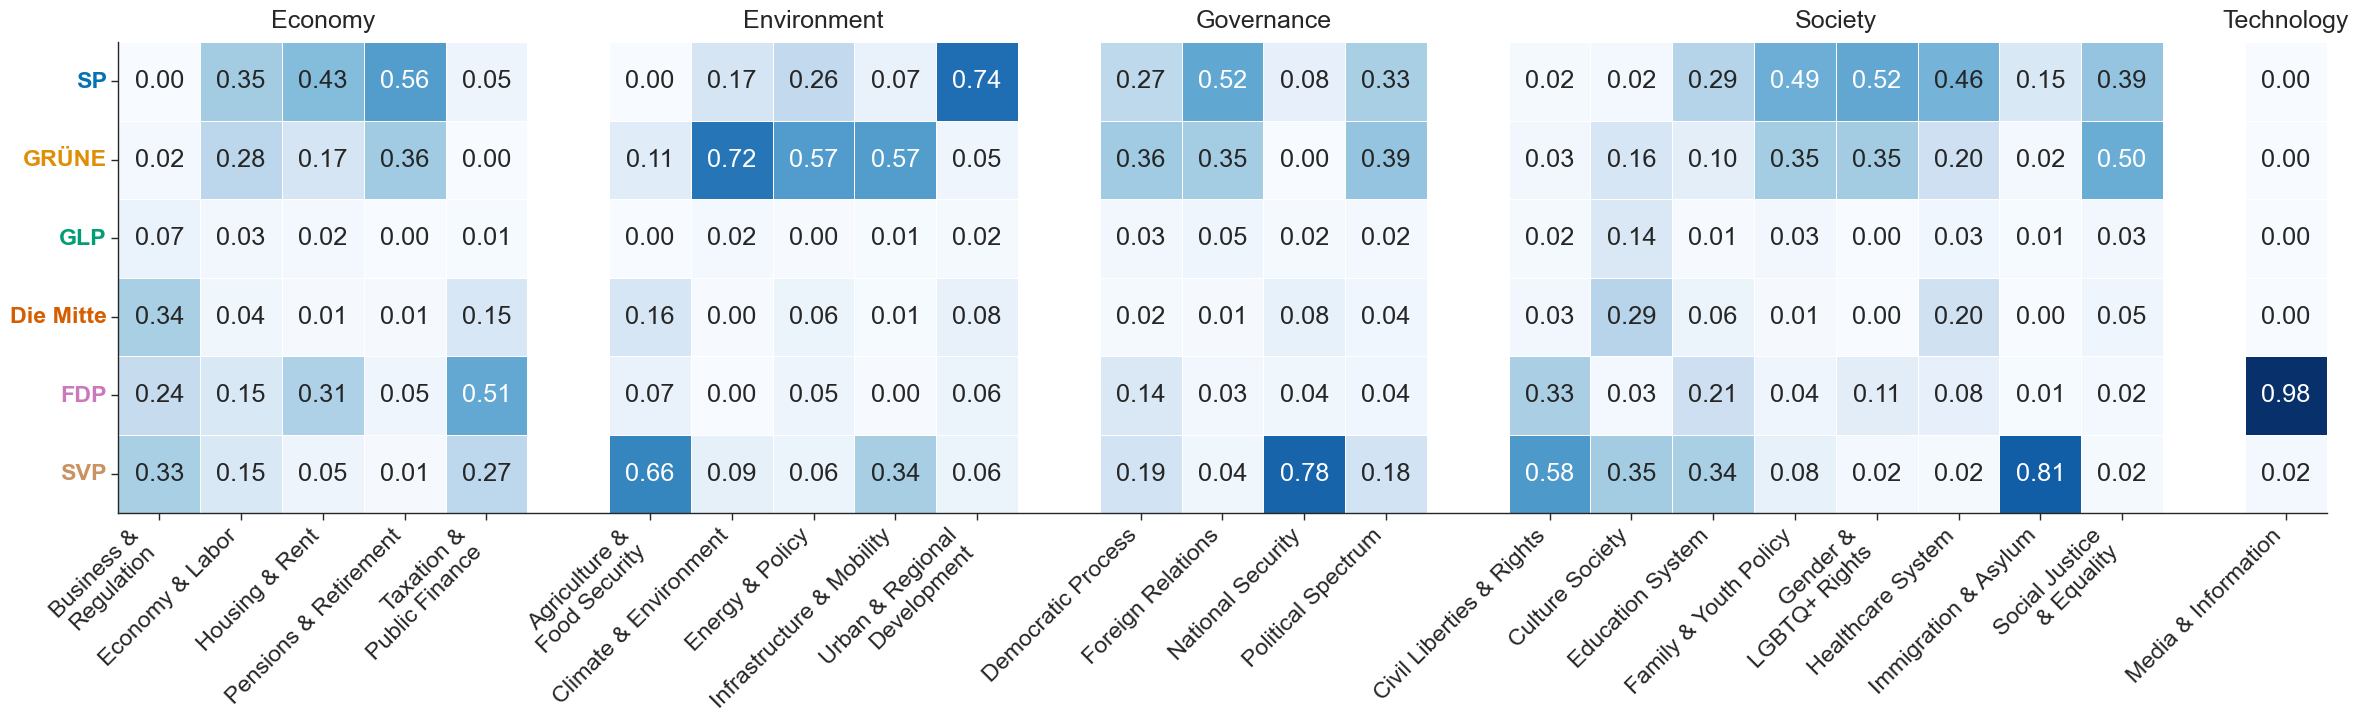

In [10]:
plot_party_topic_share_heatmap(
    df_processed,
    parties,
    [t.replace(' & ', '_').replace(' ', '_') for t in topics2 if t != 'Governance & Politics'],
    feature_groups=feature_groups,
    normalize='columns',
    save=False
)